In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

plt.rcParams["figure.dpi"] = 400
plt.style.use('ggplot')

In [29]:
df = pd.read_csv("./processed_data/muna_low_pass_stack.csv")
df.head()

,year,lower,median,upper
0,1680,-0.574377,0.559307,1.728009
1,1681,0.028045,0.943463,1.729330
2,1682,-1.998197,-0.432315,1.118048
3,1683,-2.211451,-1.311770,-0.282026
4,1684,-1.433239,-0.449325,0.533481


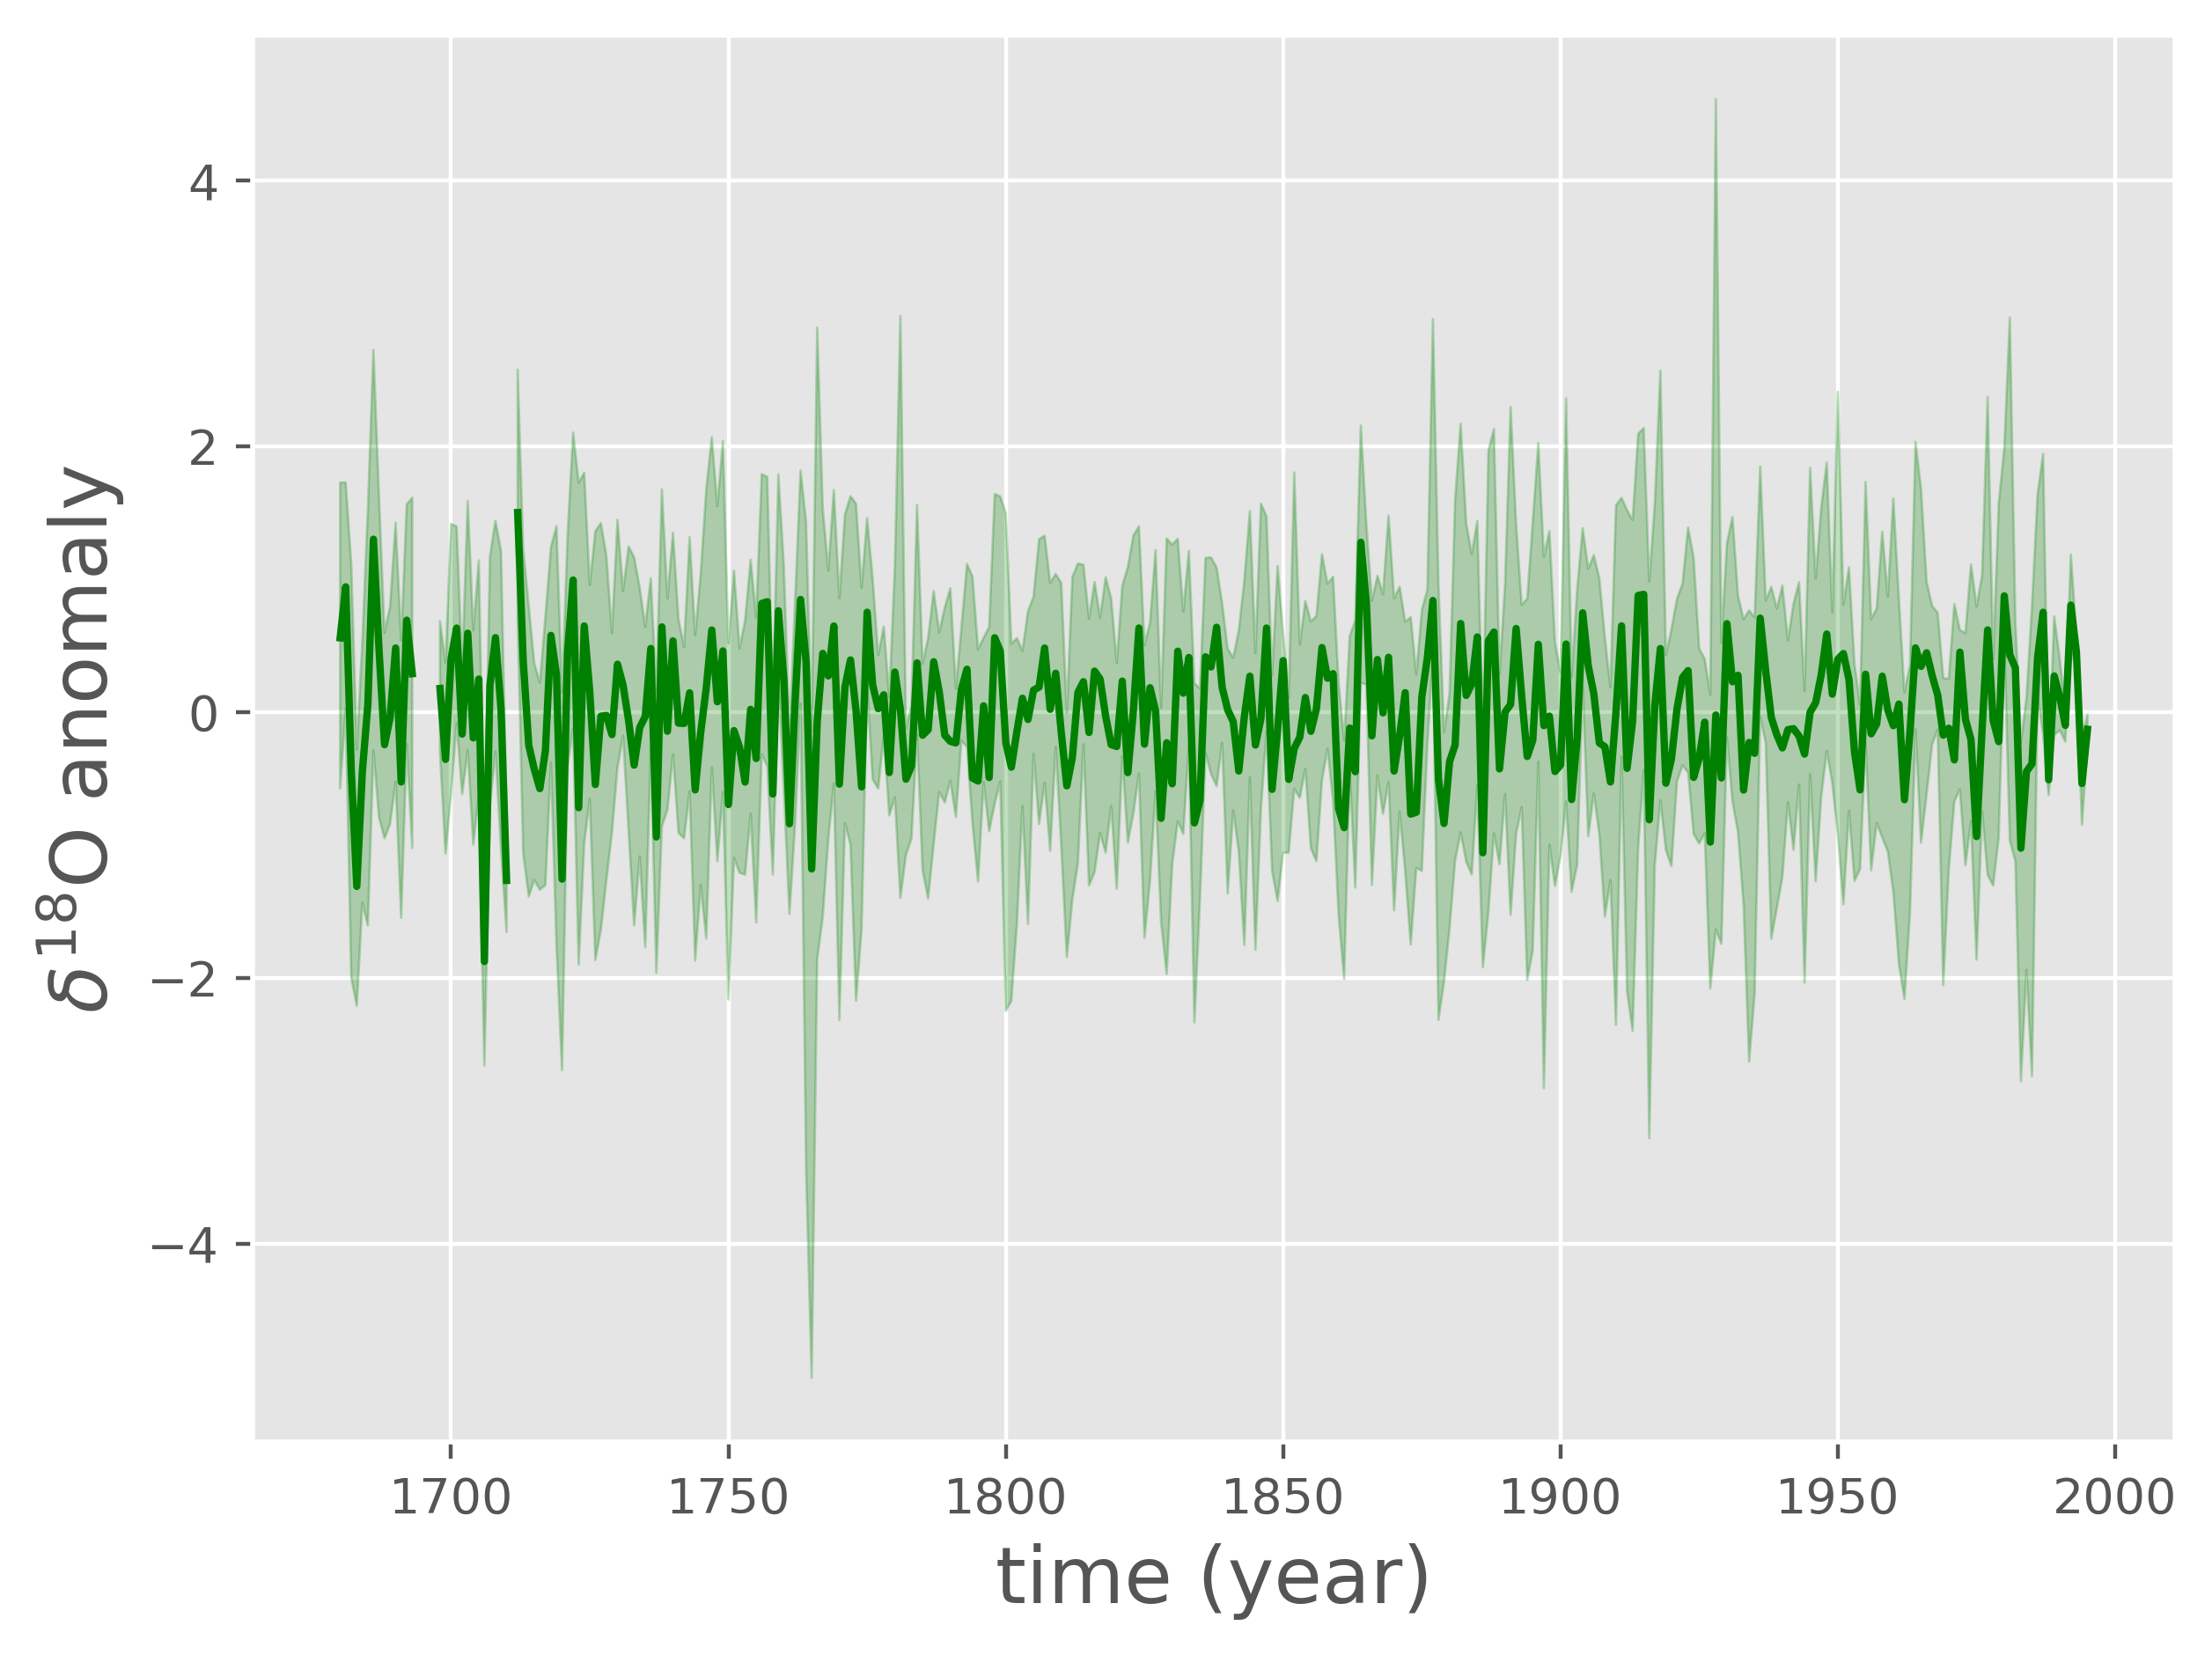

In [30]:
plt.plot(df["year"], df["median"], color="green");
plt.fill_between(df["year"], df["lower"], df["upper"], alpha=.25, color='green')
plt.xlabel('time (year)', size=16);
plt.ylabel('$\delta^{18}$O anomaly', size=16);
plt.tight_layout();
plt.savefig('./figs/munaStack.png');

In [31]:
df = df.set_index("year")

In [32]:
df.head()

,lower,median,upper
year,,,
1680,-0.574377,0.559307,1.728009
1681,0.028045,0.943463,1.729330
1682,-1.998197,-0.432315,1.118048
1683,-2.211451,-1.311770,-0.282026
1684,-1.433239,-0.449325,0.533481


In [37]:
pre = df.loc["1680":"1850"]["median"].dropna().to_numpy()
post = df.loc["1850":]["median"].dropna().to_numpy()

test = ks_2samp(pre, post)

print("Dmax = ", round(test[0],3))
print("\n")
print("p-value = ", round(test[1], 3))

Dmax =  0.077


p-value =  0.711


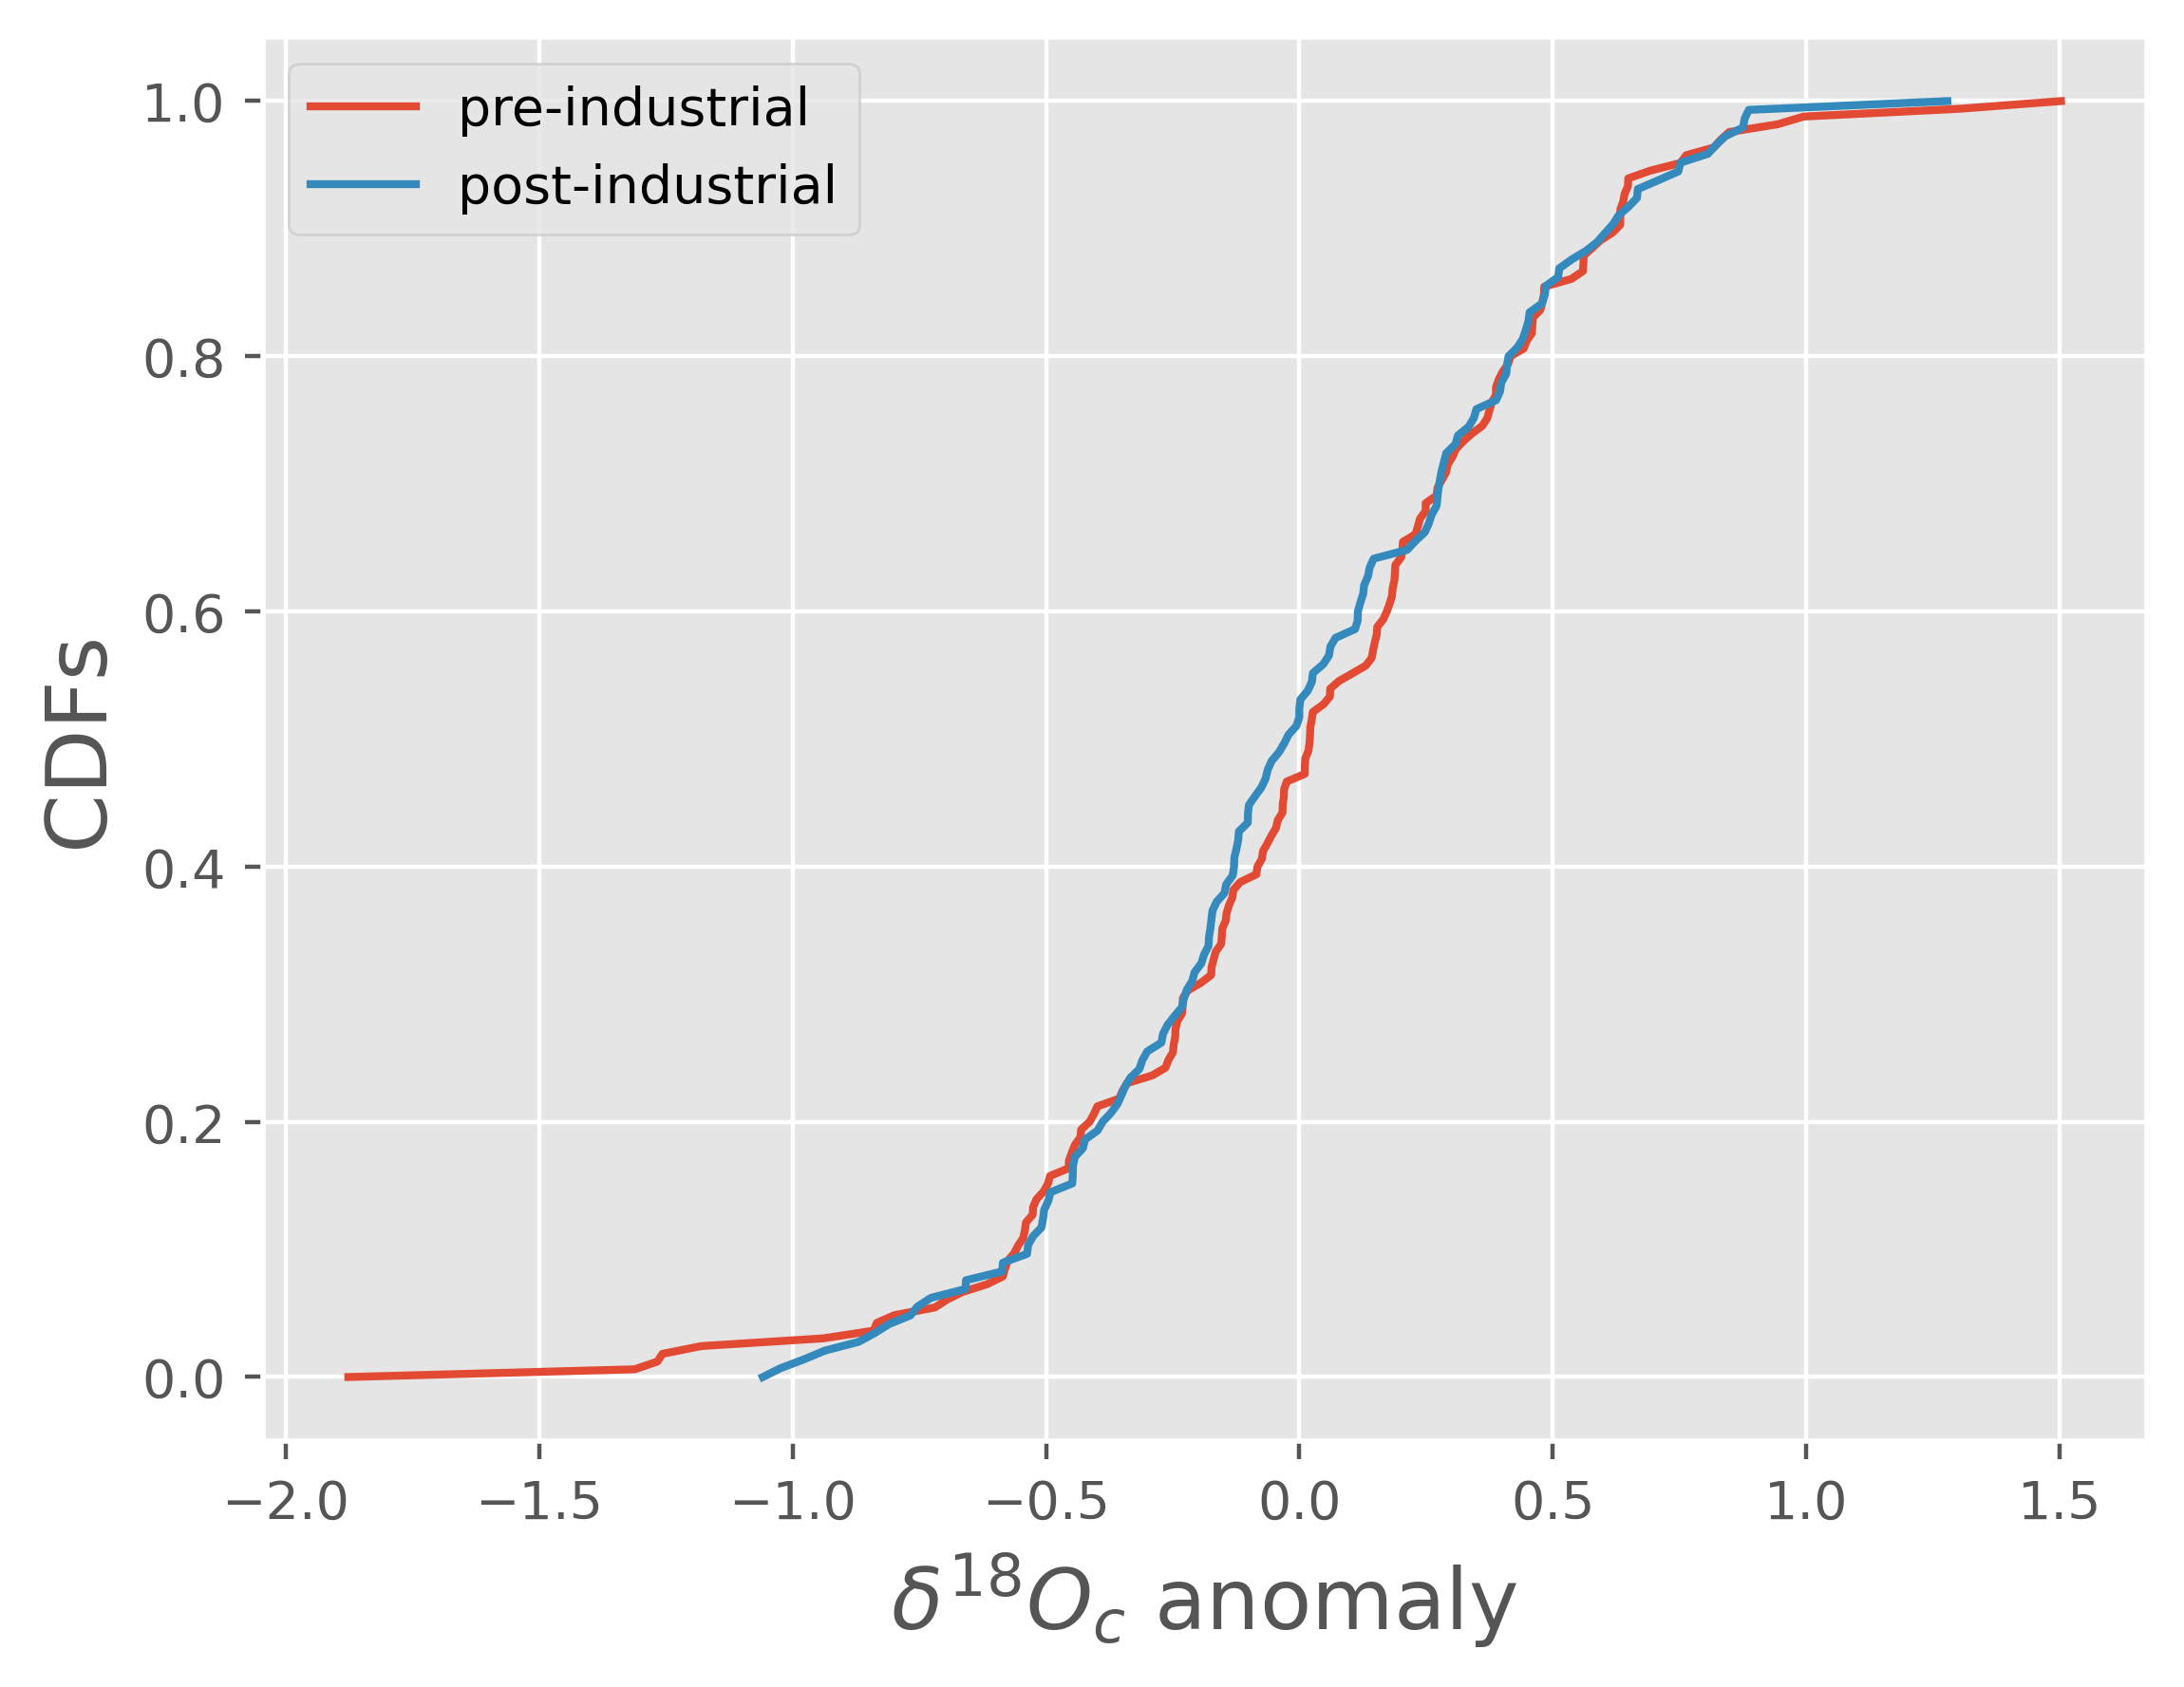

In [36]:
#sort data
x1 = np.sort(pre)
x2 = np.sort(post)

#calculate CDF values
y1 = 1. * np.arange(len(pre)) / (len(pre) - 1)
y2 = 1. * np.arange(len(post)) / (len(post) - 1)

#plot CDF
plt.plot(x1, y1, label= 'pre-industrial');
plt.plot(x2,y2, label='post-industrial');
plt.ylabel('CDFs', fontsize='16');
plt.xlabel(r'$\delta^{18}{O_c}$ anomaly', fontsize=16);
plt.legend();

plt.savefig('./figs/cdfs.png')

Jika pada uji biasa signifikansi < 0,05 berarti ada perbedaan yang signifikan dan jika > 0,05 tidak timbul perbedaan yang signifikan, penerapan ini juga berlaku pada uji Kolmogorov Smirnov. Pada uji ini, data berdistribusi tidak normal jika p < 0,05 dan data berdistribusi normal jika p > 0,05.

$D_{max} = 0.077$, $p-$value = 0.711